In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

### Loading and checking our Data

#### Loading Data

In [2]:
base = pd.read_csv('recruitment_data.csv')

##### Shape

In [3]:
base.shape

(1500, 11)

##### Info

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


#### Sample of the data

In [5]:
base.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


#### Data exploration

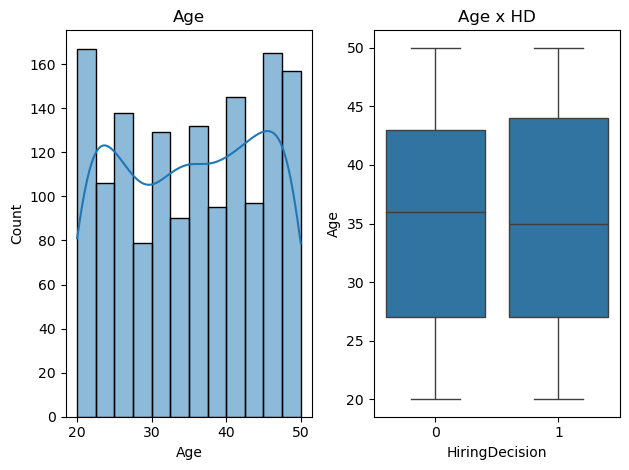

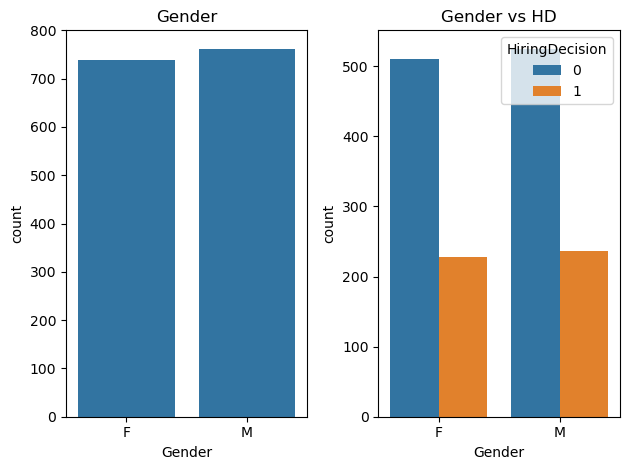

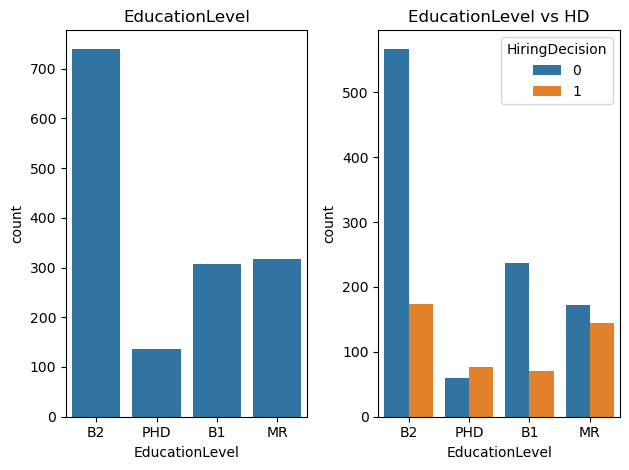

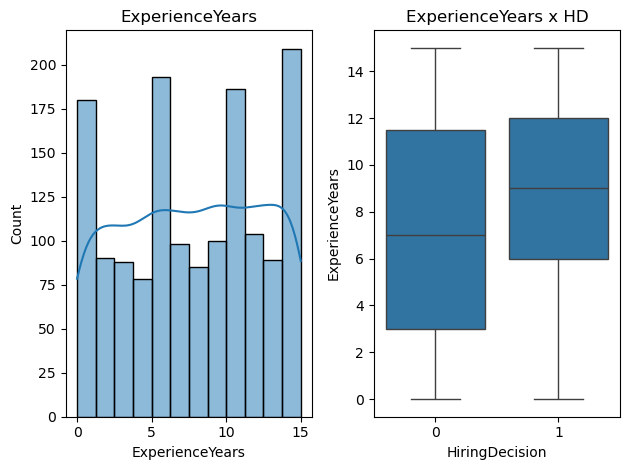

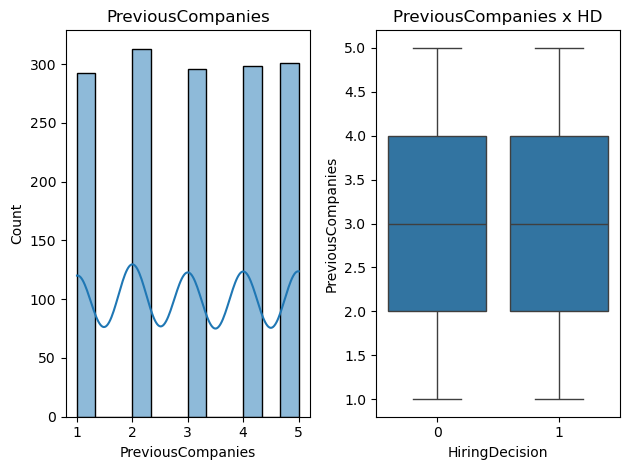

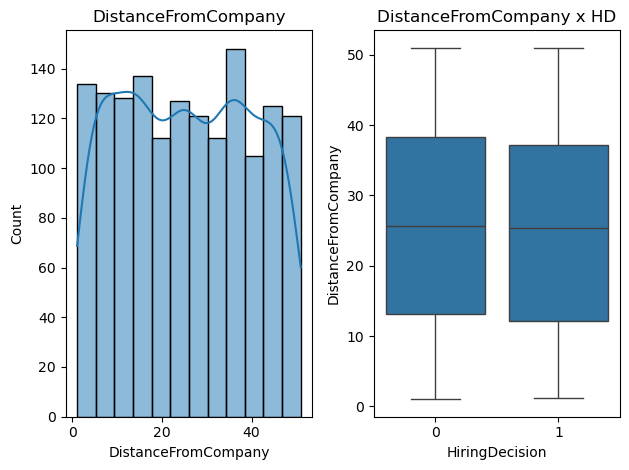

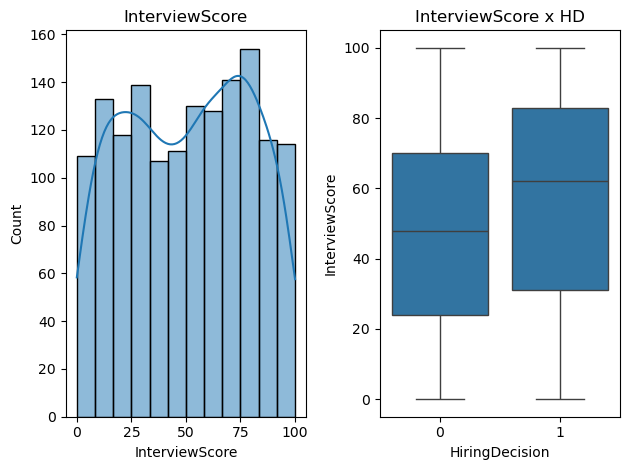

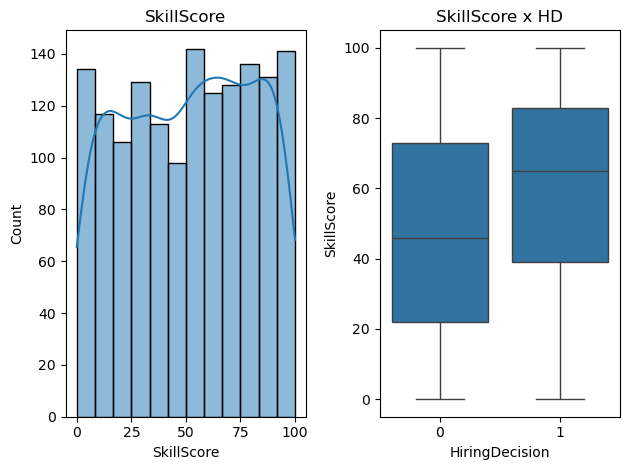

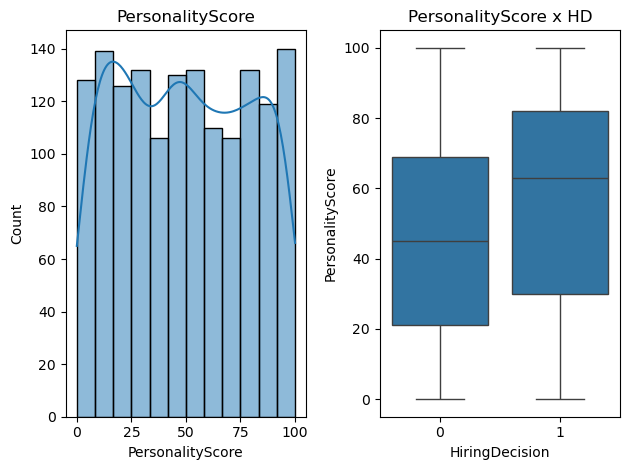

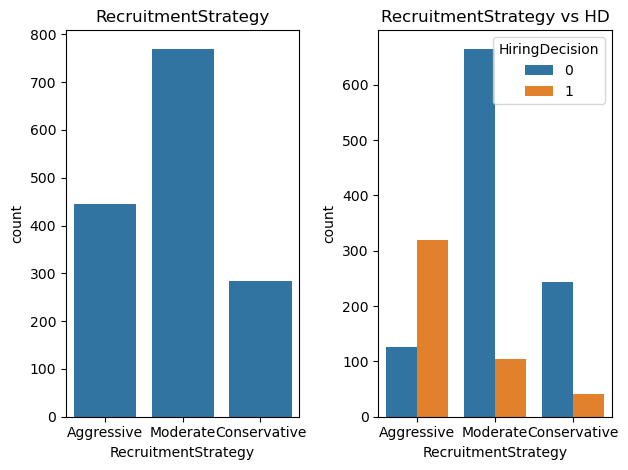

In [3]:
def plot_feature_vs_target_comparison(data):

    target_column = "HiringDecision"
    clone_base["Gender"] = clone_base["Gender"].replace({
        0: 'M',
        1: 'F',
    })

    clone_base["RecruitmentStrategy"] = clone_base["RecruitmentStrategy"].replace({
        1: "Aggressive",
        2: "Moderate",
        3: "Conservative"
    })

    clone_base["EducationLevel"] = clone_base["EducationLevel"].replace({
        1: "B1",
        2: "B2",
        3: "MR",
        4: "PHD"
    })

    
    for column in data.columns:
        
        if column != target_column:
            
            if data[column].dtype in ['int64', 'float64']: 
                fig, (ax1, ax2) = plt.subplots(1, 2)
                
                sns.histplot(data[column], kde = True, ax = ax1)
                sns.boxplot(x = target_column, y = column, data = data, ax = ax2)
    
                ax1.set_title(f"{column}")
                ax2.set_title(f"{column} x HD")

                plt.tight_layout()
                plt.show()

            else:
                fig, (ax1, ax2) = plt.subplots(1, 2)
                
                sns.countplot(x = column, data = clone_base, ax = ax1)
                sns.countplot(x = column, hue = 'HiringDecision', data = clone_base, ax = ax2)
                
                ax1.set_title(f'{column}')
                ax2.set_title(f'{column} vs HD')
                
                plt.tight_layout()
                plt.show()

clone_base = base.copy(deep=True)
plot_feature_vs_target_comparison(clone_base)

#### Conclusions of each variable

- The variable 'Age' does not appear to have a relationship with our target column, but it's interesting to note that older people show slightly better performance.

- The variable 'Gender' does not appear to have any relationship with our target column.

- The variable 'EducationLevel' leads to an interesting conclusion: individuals with a PhD have a good likelihood of being hired, but it's important to note that the sample size of data is smaller than other categories.

- The variable 'ExperienceYears' shows a strong relationship indicating that individuals with extensive experience have a higher likelihood of being hired.

- The variables 'PreviousCompany' and  'DistanceFromCompany' do not appear to have any relationship with our target column.

- The variable 'InterviewScore' leads to an obvious conclusion: individuals with better score have a greater likelihood of being hired.

- The variables 'SkillScore' and 'PersonalityScore' (range between 0 and 100 to map rating of individual skill/personality) provide another obvious conclusion: individuals with better score have a greater likelihood of being hired.

- The variable 'RecruitmentStrategy' provides interesting data: individuals who were interviewed with the 'Aggressive' strategy have a greater chance of being hired.

Let's determine 'EducationLevel', 'ExperienceYears', 'InterviewScore', 'SkillScore', 'PersonalityScore' and 'RecruitmentStrategy' as our input variables

##### Pre processing

In [8]:
X = base[['EducationLevel', 'ExperienceYears', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy']]
y = base["HiringDecision"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1910)



In [4]:
standard_scaler = StandardScaler()

X_train_sacaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

#### Applying Logistic Regression

Logistic Regression is an algorithm used to determine the class of a set of variables using probabilities. In practice, this probability is obtained from the result of the sigmoid function. Imagine an 'S' shape drawn on a graph, as shown below:

</br>

<img src="images/Logistic-curve.png" alt="Example of sigmoid function graph"/>

After applying the sigmoid function, the obtained value is interpreted on the graph. If it is to the left of the 'S', it signifies belonging to one class; if it is to the right, it signifies belonging to another class.

[Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

#### Training and predict - Logistic Regression

In [30]:
model_lr = LogisticRegression()

model_lr.fit(X_train_sacaled, Y_train)

y_pred_model_lr = model_lr.predict(X_test_scaled)

In [15]:
# We can use .predict_proba to get probability instead of class

y_pred_model_lr = model_lr.predict(X_test_scaled)


##### Validation - Logistic Regression

In [29]:
acc_model_lr = accuracy_score(Y_test, y_pred_model_lr)
auc_model_lr = roc_auc_score(Y_test, y_pred_model_lr)
classification_report_lr = classification_report(Y_test, y_pred_model_lr)

print(f"\nAccuracy: {acc_model_lr}")
print(f"\nAUC: {auc_model_lr}")
print(f"\nCR: {classification_report_lr}")


Accuracy: 0.87

AUC: 0.8296703296703296

CR:               precision    recall  f1-score   support

           0       0.85      0.96      0.91       195
           1       0.91      0.70      0.79       105

    accuracy                           0.87       300
   macro avg       0.88      0.83      0.85       300
weighted avg       0.87      0.87      0.87       300



#### Training and predict - Random Forest Classifier

In [31]:
model_rfc = RandomForestClassifier()

model_rfc.fit(X_train_sacaled, Y_train)

y_pred_model_rfc = model_rfc.predict(X_test_scaled)

##### Validation - Random Forest Classifier

In [32]:
acc_model_rfc = accuracy_score(Y_test, y_pred_model_rfc)
auc_model_rfc = roc_auc_score(Y_test, y_pred_model_rfc)
classification_report_rfc = classification_report(Y_test, y_pred_model_rfc)

print(f"\nAccuracy: {acc_model_rfc}")
print(f"\nAUC: {auc_model_rfc}")
print(f"\nCR: {classification_report_rfc}")


Accuracy: 0.9466666666666667

AUC: 0.9282051282051282

CR:               precision    recall  f1-score   support

           0       0.93      0.99      0.96       195
           1       0.98      0.87      0.92       105

    accuracy                           0.95       300
   macro avg       0.96      0.93      0.94       300
weighted avg       0.95      0.95      0.95       300

